In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
# Read the data from the CSV file
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

# Drop unrealistic values
df = df[df['Age'] >= 0]

# Fill missing values with the mean of each column
df = df.fillna(df.mean())

<ipython-input-144-e4acecd48b30>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


Test Recall: 0.9333333333333333
Test F1 Score: 0.8749999999999999
Test Accuracy: 0.9111111111111111


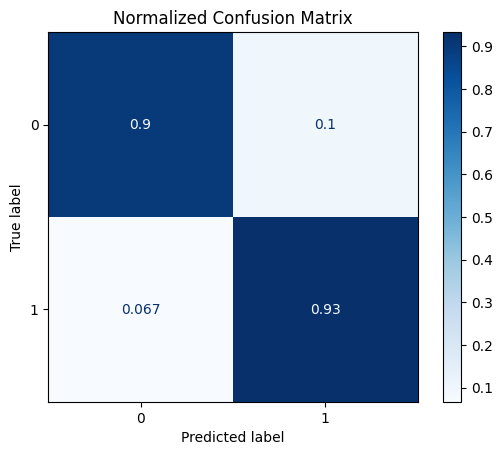

In [ ]:
# Encode categorical variable 'Sex'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Feature Engineering
# bining
bmi_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
#age_encoder = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')


# Split the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Split the data to train,validation and test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.23, random_state=42)

# Feature Scaling with ColumnTransformer
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
categorical_features = ['Sex']
bin_age_bmi = ['Age', 'BMI']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bin', bmi_encoder, bin_age_bmi),
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation on the training set
train_predictions = model.predict(X_train_scaled)
accuracy_train = recall_score(y_train, train_predictions)
#print("talidation Recall:", accuracy_train)

# Model Evaluation on the validation set
val_predictions = model.predict(X_val_scaled)
accuracy_val = recall_score(y_val, val_predictions)
#print("training Recall:", accuracy_val)

# Model Evaluation on the test set
test_predictions = model.predict(X_test_scaled)
accuracy_test = recall_score(y_test, test_predictions)
print("Test Recall:", accuracy_test)

# Model Evaluation on the training set
train_predictions = model.predict(X_train_scaled)
f1_train = f1_score(y_train, train_predictions)
#print("Training F1 Score:", f1_train)

# Model Evaluation on the validation set
val_predictions = model.predict(X_val_scaled)
f1_val = f1_score(y_val, val_predictions)
#print("Validation F1 Score:", f1_val)

# Model Evaluation on the test set
test_predictions = model.predict(X_test_scaled)
f1_test = f1_score(y_test, test_predictions)
print("Test F1 Score:", f1_test)

# Model Evaluation on the training set
train_predictions = model.predict(X_train_scaled)
f1_train = accuracy_score(y_train, train_predictions)
#print("Training Accuracy:", f1_train)

# Model Evaluation on the validation set
val_predictions = model.predict(X_val_scaled)
f1_val = accuracy_score(y_val, val_predictions)
#print("Validation Accuracy:", f1_val)

# Model Evaluation on the test set
test_predictions = model.predict(X_test_scaled)
f1_test = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", f1_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize='true'
    )
disp.ax_.set_title('Normalized Confusion Matrix')
plt.show()